In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import r2_score #R-squared
from sklearn.model_selection import train_test_split #from train and test split
from statsmodels.api import qqplot
from scipy.stats import shapiro, ttest_ind
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow
from sklearn import linear_model

import statsmodels.api as sm


In [2]:
data=pd.read_excel('Student_data.xlsx')

In [3]:
data.head()

StudentID school2 sex  age address famsize Pstatus  Medu  Fedu     Mjob  \
0          1      GP   F   18       U     GT3       A     4     4  at_home   
1          2      GP   F   17       U     GT3       T     1     1  at_home   
2          3      GP   F   15       U     LE3       T     1     1  at_home   
3          4      GP   F   15       U     GT3       T     4     2   health   
4          5      GP   F   16       U     GT3       T     3     3    other   

   ... internet romantic famrel  freetime  goout  Dalc Walc health absences  \
0  ...       no       no      4         3      4     1    1      3        6   
1  ...      yes       no      5         3      3     1    1      3        4   
2  ...      yes       no      4         3      2     2    3      3       10   
3  ...      yes      yes      3         2      2     1    1      5        2   
4  ...       no       no      4         3      2     1    2      5        4   

  Final_Grade  
0           6  
1           6  
2          10  
3          15  
4          10  

[5 rows x 32 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StudentID    395 non-null    int64 
 1   school2      395 non-null    object
 2   sex          395 non-null    object
 3   age          395 non-null    int64 
 4   address      395 non-null    object
 5   famsize      395 non-null    object
 6   Pstatus      395 non-null    object
 7   Medu         395 non-null    int64 
 8   Fedu         395 non-null    int64 
 9   Mjob         395 non-null    object
 10  Fjob         395 non-null    object
 11  reason       395 non-null    object
 12  guardian     395 non-null    object
 13  traveltime   395 non-null    int64 
 14  studytime    395 non-null    int64 
 15  failures     395 non-null    int64 
 16  schoolsup    395 non-null    object
 17  famsup       395 non-null    object
 18  paid         395 non-null    object
 19  activities   395 non-null    

In [5]:
data.isna().sum()

StudentID      0
school2        0
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
Final_Grade    0
dtype: int64

In [6]:
data['freetime'].unique()


array([3, 2, 4, 1, 5])

In [7]:
data['absences'].unique()

array([ 6,  4, 10,  2,  0, 16, 14,  7,  8, 25, 12, 54, 18, 26, 20, 56, 24,
       28,  5, 13, 15, 22,  3, 21,  1, 75, 30, 19,  9, 11, 38, 40, 23, 17])

In [8]:
## REMOVING OUTLIERS ##

In [9]:
#For the variable 'absences, based on IQR the higher upperbound for outliers is "20" , therefore we drop them from sample

In [10]:
data.drop(data[data['absences'] > 20].index, inplace = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 394
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StudentID    380 non-null    int64 
 1   school2      380 non-null    object
 2   sex          380 non-null    object
 3   age          380 non-null    int64 
 4   address      380 non-null    object
 5   famsize      380 non-null    object
 6   Pstatus      380 non-null    object
 7   Medu         380 non-null    int64 
 8   Fedu         380 non-null    int64 
 9   Mjob         380 non-null    object
 10  Fjob         380 non-null    object
 11  reason       380 non-null    object
 12  guardian     380 non-null    object
 13  traveltime   380 non-null    int64 
 14  studytime    380 non-null    int64 
 15  failures     380 non-null    int64 
 16  schoolsup    380 non-null    object
 17  famsup       380 non-null    object
 18  paid         380 non-null    object
 19  activities   380 non-null    

In [12]:
## Creating Binary variables based on yes no answers ##

In [13]:
data['internet'].unique()

array(['no', 'yes'], dtype=object)

In [14]:
data['internet'] = np.where(data['internet']=='no','0', '1')

In [15]:
data['internet'].unique()

array(['0', '1'], dtype=object)

In [16]:
data['internet'] = data['internet'].astype(int)

In [17]:
#We do the same with other binary variables to make them readable in statistical regression.

In [18]:
data.describe()

StudentID         age        Medu        Fedu  traveltime   studytime  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  380.000000   
mean   196.915789   16.671053    2.726316    2.507895    1.444737    2.042105   
std    114.950939    1.274762    1.101135    1.093247    0.704002    0.846109   
min      1.000000   15.000000    0.000000    0.000000    1.000000    1.000000   
25%     97.750000   16.000000    2.000000    2.000000    1.000000    1.000000   
50%    194.500000   17.000000    3.000000    2.000000    1.000000    2.000000   
75%    296.250000   18.000000    4.000000    3.000000    2.000000    2.000000   
max    395.000000   22.000000    4.000000    4.000000    4.000000    4.000000   

         failures    internet      famrel    freetime       goout        Dalc  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  380.000000   
mean     0.326316    0.826316    3.947368    3.260526    3.107895    1.481579   
std      0.747091    0.379337    0.905782    0.984320    1.111912    0.899826   
min      0.000000    0.000000    1.000000    1.000000    1.000000    1.000000   
25%      0.000000    1.000000    4.000000    3.000000    2.000000    1.000000   
50%      0.000000    1.000000    4.000000    3.000000    3.000000    1.000000   
75%      0.000000    1.000000    5.000000    4.000000    4.000000    2.000000   
max      3.000000    1.000000    5.000000    5.000000    5.000000    5.000000   

             Walc      health    absences  Final_Grade  
count  380.000000  380.000000  380.000000   380.000000  
mean     2.278947    3.571053    4.602632    10.421053  
std      1.289732    1.381256    4.968236     4.612313  
min      1.000000    1.000000    0.000000     0.000000  
25%      1.000000    3.000000    0.000000     8.000000  
50%      2.000000    4.000000    3.000000    11.000000  
75%      3.000000    5.000000    7.000000    14.000000  
max      5.000000    5.000000   20.000000    20.000000

In [19]:
data['schoolsup'] = np.where(data['schoolsup']=='yes','1', '0')
data['schoolsup'] = data['schoolsup'].astype(int)

In [20]:
data.describe()
data['famsup'] = np.where(data['famsup']=='yes','1', '0')
data['famsup'] = data['famsup'].astype(int)

data['paid'] = np.where(data['paid']=='yes','1', '0')
data['paid'] = data['paid'].astype(int)

data['activities'] = np.where(data['activities']=='yes','1', '0')
data['activities'] = data['activities'].astype(int)

data['nursery'] = np.where(data['nursery']=='yes','1', '0')
data['nursery'] = data['nursery'].astype(int)

data['higher'] = np.where(data['higher']=='yes','1', '0')
data['higher'] = data['higher'].astype(int)

data['romantic'] = np.where(data['romantic']=='yes','1', '0')
data['romantic'] = data['romantic'].astype(int)

In [21]:
data['Pstatus'].describe()

count     380
unique      2
top         T
freq      342
Name: Pstatus, dtype: object

In [22]:
data[('Mjob')].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [23]:
data['female'] = data['sex']

In [24]:
data['female'] = np.where(data['sex']=='F','1', '0')
data['female'] = data['female'].astype(int)

In [25]:
data['GP'] = data['school2']

In [26]:
data['GP'] = np.where(data['school2']=='GP','1', '0')
data['GP'] = data['GP'].astype(int)
#IF 1 then students attends school GP if 0 then he/she attends MS

In [27]:
data['rural'] = data['address']

In [28]:
data['rural'] = np.where(data['address']=='R','1', '0')
data['rural'] = data['rural'].astype(int)

In [29]:
data['famsize'] = np.where(data['famsize']=='GT3','1', '0')
data['famsize'] = data['famsize'].astype(int)

In [30]:
data['Pstatus'] = np.where(data['Pstatus']=='A','1', '0')
data['Pstatus'] = data['Pstatus'].astype(int)
#if Pstatus == 1 then parents live apart, 0 if otherwise

In [31]:
data = data.drop(['school2'], axis=1)
data = data.drop(['sex'], axis=1)
data = data.drop(['address'], axis=1)
#These variables are not needed anymore

In [32]:
### CREATING DUMMY VARIABLES FOR Non-integer DataTypes

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 394
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StudentID    380 non-null    int64 
 1   age          380 non-null    int64 
 2   famsize      380 non-null    int64 
 3   Pstatus      380 non-null    int64 
 4   Medu         380 non-null    int64 
 5   Fedu         380 non-null    int64 
 6   Mjob         380 non-null    object
 7   Fjob         380 non-null    object
 8   reason       380 non-null    object
 9   guardian     380 non-null    object
 10  traveltime   380 non-null    int64 
 11  studytime    380 non-null    int64 
 12  failures     380 non-null    int64 
 13  schoolsup    380 non-null    int64 
 14  famsup       380 non-null    int64 
 15  paid         380 non-null    int64 
 16  activities   380 non-null    int64 
 17  nursery      380 non-null    int64 
 18  higher       380 non-null    int64 
 19  internet     380 non-null    

In [34]:
data_num = data.select_dtypes(exclude='object')
data_obj = data.select_dtypes(include='object')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


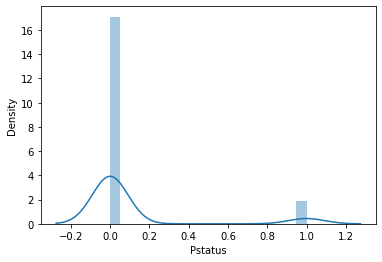

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


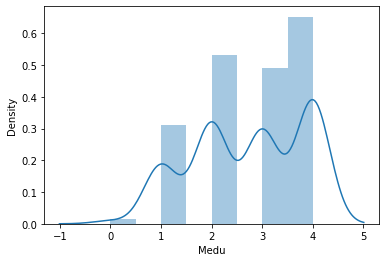

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


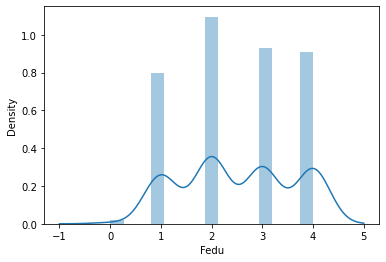

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


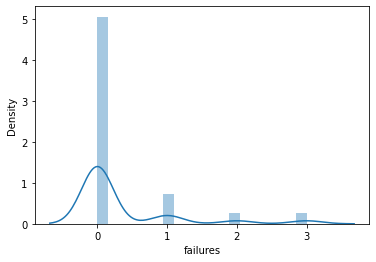

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


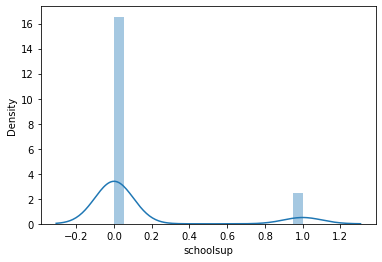

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


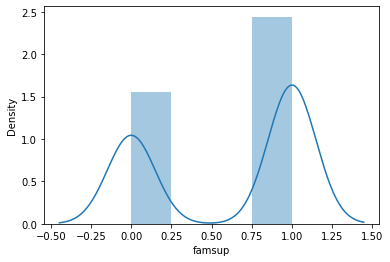

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


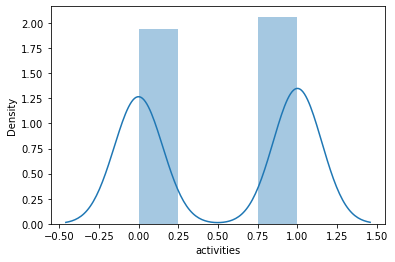

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


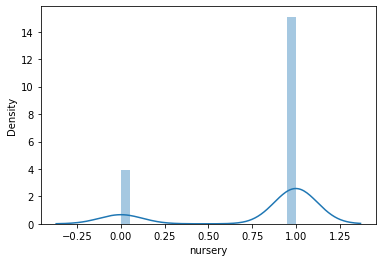

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


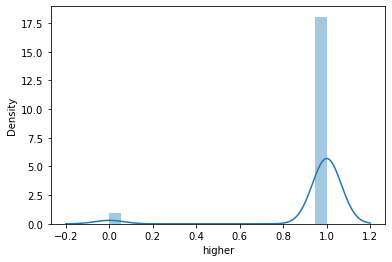

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


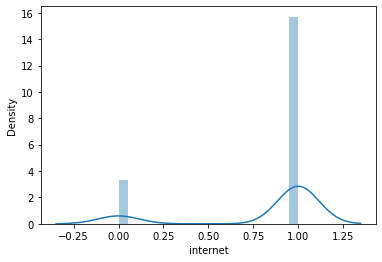

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


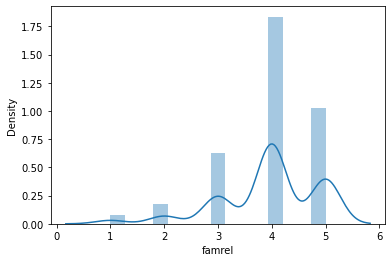

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


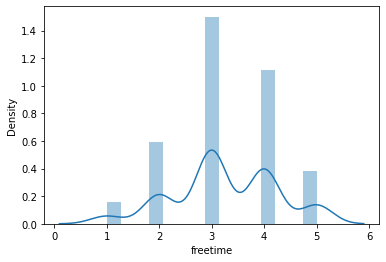

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


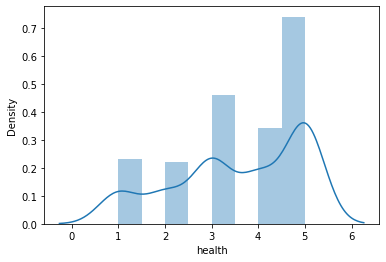

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


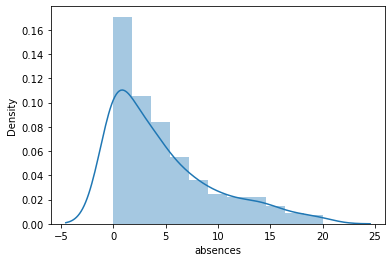

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


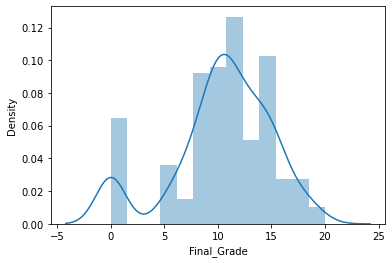

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


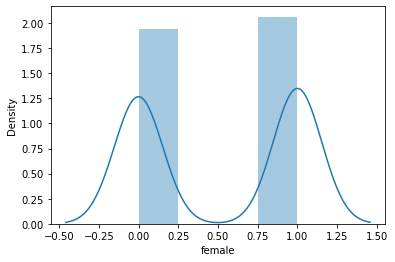

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


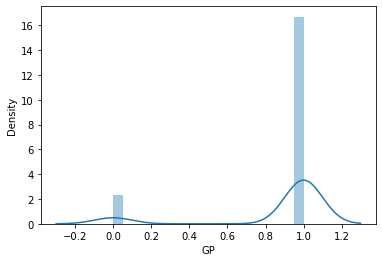

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


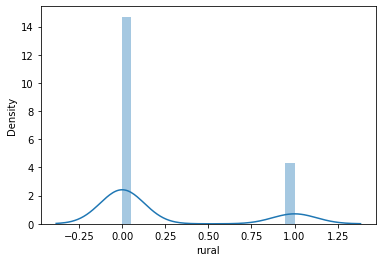

In [35]:
for i in data_num.columns.tolist():
    sns.distplot(data_num[i])
    plt.xlabel(i)
    plt.show()

<AxesSubplot:>

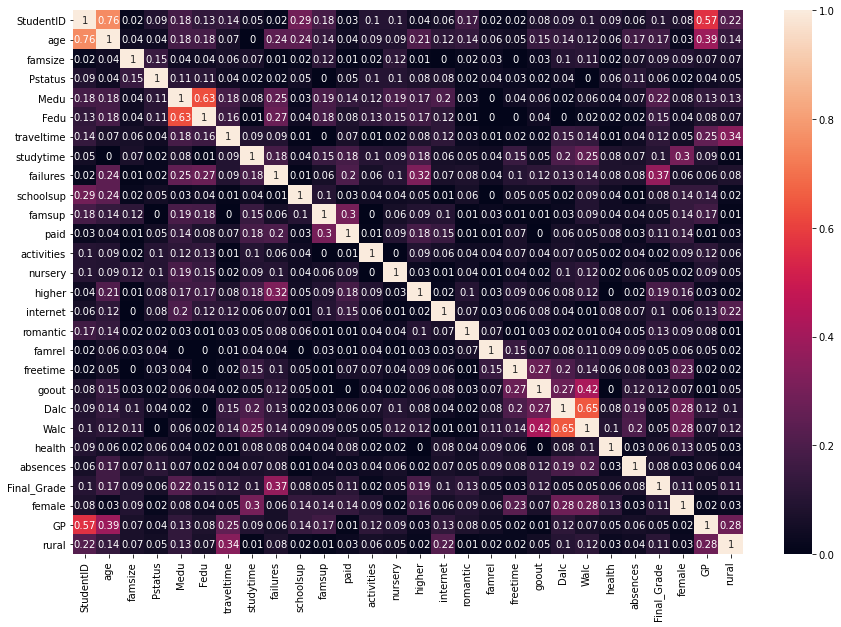

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(data_num.corr().abs().round(2), annot=True)

In [37]:
#None of the pairs have correlation of more than 80%

In [38]:
data_num.head()

StudentID  age  famsize  Pstatus  Medu  Fedu  traveltime  studytime  \
0          1   18        1        1     4     4           2          2   
1          2   17        1        0     1     1           1          2   
2          3   15        0        0     1     1           1          2   
3          4   15        1        0     4     2           1          3   
4          5   16        1        0     3     3           1          2   

   failures  schoolsup  ...  freetime  goout  Dalc  Walc  health  absences  \
0         0          1  ...         3      4     1     1       3         6   
1         0          0  ...         3      3     1     1       3         4   
2         3          1  ...         3      2     2     3       3        10   
3         0          0  ...         2      2     1     1       5         2   
4         0          0  ...         3      2     1     2       5         4   

   Final_Grade  female  GP  rural  
0            6       1   1      0  
1            6       1   1      0  
2           10       1   1      0  
3           15       1   1      0  
4           10       1   1      0  

[5 rows x 28 columns]

In [39]:
data_dummies = pd.get_dummies(data_obj, drop_first=True) 
#We drop one of the dummy variables to avoid multicolliniarity.

In [40]:
data_dummies.head()

Mjob_health  Mjob_other  Mjob_services  Mjob_teacher  Fjob_health  \
0            0           0              0             0            0   
1            0           0              0             0            0   
2            0           0              0             0            0   
3            1           0              0             0            0   
4            0           1              0             0            0   

   Fjob_other  Fjob_services  Fjob_teacher  reason_home  reason_other  \
0           0              0             1            0             0   
1           1              0             0            0             0   
2           1              0             0            0             1   
3           0              1             0            1             0   
4           1              0             0            1             0   

   reason_reputation  guardian_mother  guardian_other  
0                  0                1               0  
1                  0                0               0  
2                  0                1               0  
3                  0                1               0  
4                  0                0               0

In [41]:
data_model1 = data_num.join(data_dummies, how='left')

In [42]:
### CREATING THE MODEL ###

#Given large number of observation backward stewise elimination will be done

# Initial hypothesis is that all the mentioned variables apart from 'StudentID' may have impact on Final Grade

#We drop variable StudentID because it is not reasonable to assume that it can predict performance of a Student

In [43]:
data_model1 = data_model1.drop(['StudentID'], axis=1)

In [44]:
Y = data_model1.Final_Grade
X = data_model1.drop('Final_Grade', axis=1)
X = sm.add_constant(X)

In [45]:
X0, X1, Y0, Y1 = train_test_split(X,Y, test_size=0.25, random_state=42)

In [46]:
model = sm.OLS(Y0, X0)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     2.713
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.76e-06
Time:                        20:14:21   Log-Likelihood:                -783.64
No. Observations:                 285   AIC:                             1647.
Df Residuals:                     245   BIC:                             1793.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.8891      5.279      2.252      0.025       1.491      22.287
age                  -0.1002      0.246     -0.408      0.684      -0.585       0.384
famsize              -1.3336      0.585     -2.281      0.023      -2.485      -0.182
Pstatus               0.5317      0.863      0.616      0.538      -1.168       2.232
Medu                  0.6373      0.393      1.623      0.106      -0.136       1.411
Fedu                 -0.1373      0.344     -0.400      0.690      -0.814       0.540
traveltime           -0.1193      0.404     -0.296      0.768      -0.914       0.676
studytime             0.5152      0.332      1.551      0.122      -0.139       1.169
failures             -1.9563      0.394     -4.963      0.000      -2.733      -1.180
schoolsup            -0.9453      0.839     -1.126      0.261      -2.598       0.708
famsup               -1.0014      0.562     -1.783      0.076      -2.108       0.105
paid                  0.1350      0.570      0.237      0.813      -0.988       1.258
activities           -0.8886      0.541     -1.643      0.102      -1.954       0.176
nursery               0.0012      0.667      0.002      0.999      -1.313       1.315
higher                0.3240      1.345      0.241      0.810      -2.325       2.973
internet              0.3603      0.712      0.506      0.613      -1.041       1.762
romantic             -1.5185      0.556     -2.733      0.007      -2.613      -0.424
famrel                0.1123      0.301      0.373      0.709      -0.481       0.705
freetime              0.4794      0.291      1.645      0.101      -0.095       1.053
goout                -0.3578      0.276     -1.297      0.196      -0.901       0.185
Dalc                 -0.7179      0.397     -1.810      0.072      -1.499       0.063
Walc                  0.4329      0.294      1.475      0.142      -0.145       1.011
health               -0.1401      0.199     -0.703      0.483      -0.533       0.253
absences              0.1232      0.055      2.227      0.027       0.014       0.232
female               -0.5605      0.597     -0.938      0.349      -1.737       0.616
GP                   -0.5774      0.936     -0.617      0.538      -2.421       1.266
rural                -0.6072      0.724     -0.839      0.402      -2.032       0.818
Mjob_health           0.7834      1.339      0.585      0.559      -1.855       3.422
Mjob_other            0.1267      0.853      0.148      0.882      -1.554       1.808
Mjob_services         0.7693      0.949      0.811      0.418      -1.100       2.638
Mjob_teacher         -1.2487      1.222     -1.022      0.308      -3.655       1.158
Fjob_health           0.1140      1.647      0.069      0.945      -3.129       3.357
Fjob_other           -0.7505      1.189     -0.631      0.528      -3.092

In [47]:
Y1_pred=results.predict(X1)
print('R^2_test:', r2_score(Y1, Y1_pred))

R^2_test: 0.11285048170677014


In [48]:
#MODEL 1
#As we can see in the Model 1 the adjusted r-squared and r squared vary significantly,
#indicating that some of our variables are non-informative, that is they do not possess
# significant explaining power for our dependent variable

## This is also true based on very low t-statistics for most of our variables


In [49]:
# Moreover There are number of variables that may be influencing each other, therefore to avoid 
# multicollinearity and decrease VIF, we should pick 1 variable from such pairs (or trios)

#For example  "PStatus" and "Famrel" or "Rural", "Traveltime" and "GP" (school)

In [50]:
#plt.figure(figsize=(20,15))
#sns.heatmap(data_model1.corr().abs().round(2), annot=True)

In [51]:
#We start dropping such pairs variables - the one with higher correlation with dependent
# variable will be left in the model
data_model2 = data_model1.drop(['traveltime'], axis=1)
data_model2 = data_model2.drop(['freetime'], axis=1)

#next we drop non-informative variables

data_model2 = data_model2.drop(['paid'], axis=1)
data_model2 = data_model2.drop(['nursery'], axis=1)


In [52]:
Y = data_model2.Final_Grade
X = data_model2.drop('Final_Grade', axis=1)
X = sm.add_constant(X)

X0, X1, Y0, Y1 = train_test_split(X,Y, test_size=0.25, random_state=42)

model = sm.OLS(Y0, X0)
results = model.fit()
results.summary()
#MODEL 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     2.956
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           5.10e-07
Time:                        20:14:21   Log-Likelihood:                -785.28
No. Observations:                 285   AIC:                             1643.
Df Residuals:                     249   BIC:                             1774.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.8864      5.000      2.577      0.011       3.039      22.733
age                  -0.0968      0.242     -0.400      0.689      -0.573       0.380
famsize              -1.2283      0.566     -2.170      0.031      -2.343      -0.114
Pstatus               0.5102      0.854      0.597      0.551      -1.172       2.192
Medu                  0.6208      0.391      1.590      0.113      -0.148       1.390
Fedu                 -0.1394      0.338     -0.412      0.681      -0.805       0.527
studytime             0.4862      0.330      1.473      0.142      -0.164       1.136
failures             -1.9719      0.388     -5.082      0.000      -2.736      -1.208
schoolsup            -0.9412      0.835     -1.127      0.261      -2.586       0.703
famsup               -0.9486      0.535     -1.773      0.077      -2.002       0.105
activities           -0.8638      0.533     -1.619      0.107      -1.914       0.187
higher                0.2887      1.339      0.216      0.829      -2.348       2.925
internet              0.3389      0.706      0.480      0.632      -1.052       1.730
romantic             -1.5041      0.551     -2.731      0.007      -2.589      -0.419
famrel                0.1538      0.297      0.517      0.606      -0.432       0.740
goout                -0.2399      0.266     -0.904      0.367      -0.763       0.283
Dalc                 -0.6227      0.389     -1.600      0.111      -1.390       0.144
Walc                  0.3777      0.288      1.310      0.192      -0.190       0.946
health               -0.1406      0.197     -0.713      0.476      -0.529       0.248
absences              0.1210      0.055      2.219      0.027       0.014       0.228
female               -0.6569      0.589     -1.115      0.266      -1.817       0.503
GP                   -0.6129      0.916     -0.669      0.504      -2.416       1.190
rural                -0.6757      0.694     -0.973      0.331      -2.043       0.692
Mjob_health           1.0471      1.321      0.792      0.429      -1.555       3.650
Mjob_other            0.3111      0.842      0.370      0.712      -1.347       1.969
Mjob_services         1.0174      0.933      1.090      0.277      -0.821       2.856
Mjob_teacher         -0.9015      1.200     -0.751      0.453      -3.265       1.462
Fjob_health          -0.1082      1.625     -0.067      0.947      -3.308       3.092
Fjob_other           -0.9149      1.155     -0.792      0.429      -3.190       1.360
Fjob_services        -0.3701      1.186     -0.312      0.755      -2.705       1.965
Fjob_teacher          1.5087      1.458      1.035      0.302      -1.362       4.380
reason_home           0.2243      0.635      0.353      0.724      -1.027       1.476
reason_other          1.4321      0.921      1.556      0.121      -0.381

In [53]:
Y1_pred=results.predict(X1)
print('R^2_test:', r2_score(Y1, Y1_pred))

R^2_test: 0.10390032085625067


In [54]:
#Conducting joint f-test for dummy variables of job

In [55]:

hypotheses = '(Fjob_other = 0),(Fjob_teacher = 0),(Fjob_health = 0),(Fjob_services= 0),(Mjob_other= 0), (Mjob_teacher= 0),(Mjob_health= 0),(Mjob_services= 0)'

f_test = results.f_test(hypotheses)
print(f_test)

<F test: F=array([[1.29878411]]), p=0.24452159436561766, df_denom=249, df_num=8>


In [56]:
>>> A = np.identity(len(results.params))
>>> A = A[1:,:]
print(results.f_test(A))

<F test: F=array([[2.95589175]]), p=5.101823206058147e-07, df_denom=249, df_num=35>


In [57]:
# Based on the results, we can assume that the grade of a student 
# does not depend on the sector where his/her parents work
# it might however still depened on the job's salary, number of hours, etc. 

In [58]:
data_model3 = data_model2.drop(['Fjob_other'], axis=1)
data_model3 = data_model3.drop(['Fjob_teacher'], axis=1)
data_model3 = data_model3.drop(['Fjob_health'], axis=1)
data_model3 = data_model3.drop(['Fjob_services'], axis=1)
data_model3 = data_model3.drop(['Mjob_other'], axis=1)
data_model3 = data_model3.drop(['Mjob_teacher'], axis=1)
data_model3 = data_model3.drop(['Mjob_health'], axis=1)
data_model3 = data_model3.drop(['Mjob_services'], axis=1)



In [59]:
#Conducting joint f-test for dummy variables showing the "reason for applying"


In [60]:

data_model3 = data_model3.drop(['reason_home'], axis=1)

In [61]:
Y = data_model3.Final_Grade
X = data_model3.drop('Final_Grade', axis=1)
X = sm.add_constant(X)

X0, X1, Y0, Y1 = train_test_split(X,Y, test_size=0.25, random_state=42)

model = sm.OLS(Y0, X0)
results = model.fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     3.557
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           8.31e-08
Time:                        20:14:21   Log-Likelihood:                -791.14
No. Observations:                 285   AIC:                             1636.
Df Residuals:                     258   BIC:                             1735.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.8630      4.882      2.635      0.009       3.250      22.476
age                  -0.1112      0.241     -0.462      0.645      -0.586       0.363
famsize              -1.2133      0.554     -2.189      0.030      -2.305      -0.122
Pstatus               0.5118      0.847      0.605      0.546      -1.155       2.179
Medu                  0.5094      0.316      1.613      0.108      -0.112       1.131
Fedu                  0.0814      0.313      0.260      0.795      -0.536       0.699
studytime             0.4371      0.321      1.363      0.174      -0.194       1.068
failures             -1.8041      0.381     -4.733      0.000      -2.555      -1.054
schoolsup            -0.8187      0.824     -0.993      0.322      -2.442       0.804
famsup               -0.9357      0.534     -1.752      0.081      -1.987       0.116
activities           -0.9426      0.524     -1.798      0.073      -1.975       0.090
higher                0.3757      1.317      0.285      0.776      -2.219       2.970
internet              0.4051      0.695      0.583      0.561      -0.964       1.774
romantic             -1.3200      0.537     -2.459      0.015      -2.377      -0.263
famrel                0.0987      0.291      0.339      0.735      -0.474       0.672
goout                -0.2238      0.261     -0.856      0.393      -0.738       0.291
Dalc                 -0.5602      0.370     -1.515      0.131      -1.288       0.168
Walc                  0.2230      0.276      0.808      0.420      -0.320       0.766
health               -0.0794      0.189     -0.420      0.675      -0.451       0.293
absences              0.1226      0.054      2.264      0.024       0.016       0.229
female               -0.6822      0.577     -1.181      0.239      -1.819       0.455
GP                   -0.4887      0.906     -0.539      0.590      -2.274       1.296
rural                -0.7343      0.685     -1.072      0.285      -2.084       0.615
reason_other          1.8836      0.859      2.193      0.029       0.193       3.575
reason_reputation     0.9555      0.629      1.518      0.130      -0.284       2.195
guardian_mother      -0.0856      0.604     -0.142      0.887      -1.276       1.105
guardian_other        1.2535      1.167      1.074      0.284      -1.045       3.552
==============================================================================
Omnibus:                       20.078   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.251
Skew:                          -0.665   Prob(JB):                     1.47e-05
Kurtosis:                       3.322   Cond. No.                         395.
==============================================================================

Notes:
[1] Standard Errors a

In [62]:
Y1_pred=results.predict(X1)
print('R^2_test:', r2_score(Y1, Y1_pred))

R^2_test: 0.1308614172150807


In [63]:
## We can clearly see that we still have to ommit unnnecessary variables. 
#Moreover there is clear evidence of overfitting, based on difference of 2 R-squareds (sample and train)
# For the next model we create more interaction terms, and omit variables with least significance

In [64]:
data_model3['MG_edu'] = data_model3['Medu']*data_model3['guardian_mother']*data_model3['Pstatus']



In [65]:
data_model3['guardian_father'] = np.where(data['guardian']=='father',1,0)

In [66]:
data_model3['FG_edu'] = data_model3['Fedu']*data_model3['guardian_father']*data_model3['Pstatus']

In [67]:
data_model3['avg_edu']= (data_model3['Fedu']+data_model3['Fedu'])/2
data_model3['T_edu']= data_model3['avg_edu']*(1-data_model3['Pstatus'])

In [68]:
data_model3['factivities']= data_model3['activities']*data_model3['female']

In [69]:
data_model4 = data_model3.drop(['guardian_father'], axis=1)
data_model4 = data_model4.drop(['guardian_mother'], axis=1)
data_model4 = data_model4.drop(['guardian_other'], axis=1)

data_model4 = data_model4.drop(['avg_edu'], axis=1)

data_model4 = data_model4.drop(['famrel'], axis=1)
data_model4 = data_model4.drop(['famsize'], axis=1)
data_model4 = data_model4.drop(['Dalc'], axis=1)
data_model4 = data_model4.drop(['Walc'], axis=1)
data_model4 = data_model4.drop(['T_edu'], axis=1)

data_model4['Alc']= (data_model3['Dalc']*5 + data_model3['Walc'])/7

data_model4['Falc']= (data_model4['Alc']*data_model3['female'])
#data_model4 = data_model4.drop(['Pstatus'], axis=1)
#data_model4['sizefem']= data_model4['famsize']*data_model4['famrel']



In [70]:
Y = data_model4.Final_Grade
X = data_model4.drop('Final_Grade', axis=1)
X = sm.add_constant(X)

X0, X1, Y0, Y1 = train_test_split(X,Y, test_size=0.25, random_state=42)


model = sm.OLS(Y0, X0)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     3.908
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.08e-08
Time:                        20:14:21   Log-Likelihood:                -789.19
No. Observations:                 285   AIC:                             1630.
Df Residuals:                     259   BIC:                             1725.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.5058      4.687      2.668      0.008       3.276      21.735
age                  -0.0662      0.231     -0.287      0.774      -0.521       0.388
Pstatus               2.8523      1.770      1.611      0.108      -0.634       6.338
Medu                  0.4134      0.305      1.357      0.176      -0.186       1.013
Fedu                  0.2152      0.305      0.706      0.481      -0.385       0.815
studytime             0.5102      0.318      1.607      0.109      -0.115       1.135
failures             -1.6918      0.358     -4.726      0.000      -2.397      -0.987
schoolsup            -0.9515      0.809     -1.177      0.240      -2.544       0.641
famsup               -1.1844      0.536     -2.209      0.028      -2.240      -0.129
activities           -0.4112      0.768     -0.535      0.593      -1.924       1.102
higher                0.1917      1.298      0.148      0.883      -2.365       2.749
internet              0.1797      0.695      0.258      0.796      -1.189       1.549
romantic             -1.3915      0.530     -2.627      0.009      -2.435      -0.348
goout                -0.2246      0.246     -0.911      0.363      -0.710       0.261
health               -0.0198      0.187     -0.106      0.916      -0.387       0.348
absences              0.1583      0.055      2.870      0.004       0.050       0.267
female               -2.0184      1.349     -1.496      0.136      -4.675       0.638
GP                   -0.9039      0.891     -1.015      0.311      -2.658       0.850
rural                -1.1283      0.666     -1.694      0.092      -2.440       0.184
reason_other          1.7314      0.852      2.033      0.043       0.055       3.408
reason_reputation     1.0825      0.622      1.741      0.083      -0.142       2.307
MG_edu               -0.5818      0.619     -0.940      0.348      -1.801       0.637
FG_edu               -2.2115      0.955     -2.315      0.021      -4.092      -0.331
factivities          -1.1437      1.014     -1.128      0.261      -3.141       0.854
Alc                  -0.7027      0.429     -1.637      0.103      -1.548       0.143
Falc                  1.4389      0.772      1.864      0.063      -0.081       2.959
==============================================================================
Omnibus:                       17.825   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.374
Skew:                          -0.623   Prob(JB):                     6.21e-05
Kurtosis:                       3.281   Cond. No.                         371.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
Y1_pred = results.predict(X1)
print ('R2', r2_score(Y1,Y1_pred))

R2 0.19180661109363806


In [189]:
#MODEL 5
data_model5 = data_model4


In [190]:
data_model5 = data_model5.drop(['internet'], axis=1)

data_model5 = data_model5.drop(['female'], axis=1)
data_model5 = data_model5.drop(['higher'], axis=1)
data_model5 = data_model5.drop(['GP'], axis=1)
data_model5 = data_model5.drop(['health'], axis=1)
data_model5 = data_model5.drop(['age'], axis=1)

data_model5 = data_model5.drop(['MG_edu'], axis=1)
data_model5 = data_model5.drop(['activities'], axis=1)
data_model5 = data_model5.drop(['Alc'], axis=1)
data_model5 = data_model5.drop(['Falc'], axis=1)

In [191]:
#experimenting with "Fedu"
data_model5['Fedu2']= data['Fedu']*data['Fedu']

##Results in even larger overfitting

data_model5 = data_model5.drop(['Fedu'], axis=1)
data_model5 = data_model5.drop(['Fedu2'], axis=1)


In [192]:
Y = data_model5.Final_Grade
X = data_model5.drop('Final_Grade', axis=1)
X = sm.add_constant(X)

X0, X1, Y0, Y1 = train_test_split(X,Y, test_size=0.25, random_state=42)


model_final = sm.OLS(Y0,X0)
results = model_final.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     6.634
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.46e-11
Time:                        21:06:01   Log-Likelihood:                -792.67
No. Observations:                 285   AIC:                             1615.
Df Residuals:                     270   BIC:                             1670.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.4075      1.161      8.962      0.000       8.121      12.694
Pstatus               1.4235      0.847      1.681      0.094      -0.244       3.091
Medu                  0.5329      0.229      2.325      0.021       0.082       0.984
studytime             0.4365      0.297      1.471      0.142      -0.148       1.021
failures             -1.7729      0.333     -5.324      0.000      -2.429      -1.117
schoolsup            -0.8931      0.760     -1.176      0.241      -2.389       0.603
famsup               -1.2796      0.507     -2.525      0.012      -2.277      -0.282
romantic             -1.3055      0.514     -2.542      0.012      -2.317      -0.294
goout                -0.3100      0.230     -1.351      0.178      -0.762       0.142
absences              0.1182      0.050      2.364      0.019       0.020       0.217
rural                -0.9079      0.589     -1.543      0.124      -2.067       0.251
reason_other          1.6929      0.820      2.065      0.040       0.079       3.307
reason_reputation     0.9737      0.602      1.617      0.107      -0.212       2.160
FG_edu               -1.7112      0.762     -2.245      0.026      -3.212      -0.210
factivities          -1.3639      0.574     -2.378      0.018      -2.493      -0.235
==============================================================================
Omnibus:                       20.207   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.407
Skew:                          -0.666   Prob(JB):                     1.36e-05
Kurtosis:                       3.336   Cond. No.                         39.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [193]:
Y1_pred = results.predict(X1)
print ('R2', r2_score(Y1,Y1_pred))

R2 0.20079256447095462


In [194]:
model_final = sm.OLS(Y0,X0)

In [195]:
results_ridge = model_final.fit_regularized(L1_wt=1,alpha=0.01)

In [196]:
#adjusted coefficients
results_ridge.params

const                10.218694
Pstatus               1.263713
Medu                  0.555872
studytime             0.444344
failures             -1.748020
schoolsup            -0.781384
famsup               -1.215242
romantic             -1.245134
goout                -0.295246
absences              0.117992
rural                -0.824550
reason_other          1.547693
reason_reputation     0.876520
FG_edu               -1.550601
factivities          -1.317758
dtype: float64

In [197]:
####As we can see adding interaction terms, significantly reduced difference between just the R square
#and adjusted R square. It aslo reduced difference between R squared between sample set and train sets

In [198]:
##Although there are some variables in the final model that are not statistically 
#signficiant in 90% signficance level 
#they were left in the model because removing them resulted in larger overfitting,
#and increasedbias on other coefficients


In [199]:
# In the last model total Alcohol consumption was used instead of daily and weekday.
#Also intercation between female and alcohol consumption was added revealing 
# signficiant correaltion between consumption and grades
#Particularly 1 unit increase decreases final grade on average by 0.26 point for a man
#however it increases score of a woman who consumes alcohol by 0.2 on average.

In [200]:
#residuals of the model
residuals=results.resid
residuals.head(10)
pred_values=results.predict()

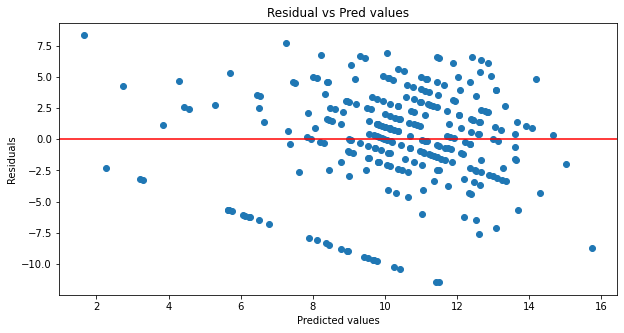

In [201]:
plt.figure(figsize=(10,5))
plt.scatter(pred_values,residuals)
plt.axhline(y=0, c="red")
plt.title("Residual vs Pred values")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.show()

In [202]:
bnames = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
breush = het_breuschpagan(residuals, results.model.exog)
print(list(zip(bnames, breush)))

[('Lagrange multiplier statistic', 27.262900896633862), ('p-value', 0.017792603588091396), ('f-value', 2.0400032402062442), ('f p-value', 0.015384548211978016)]


In [203]:
# homoscedacity assumption is rejected on 95% level of significance, so one of Gaus Markoff asumptions does not held
# There is evidence of heteroscedacticity

In [204]:
# Rainbow test for linearity 
# The null hypothesis assumes linearity
rnames=["fstat", "p-value"]
rainbow=linear_rainbow(results)
print(list(zip(rnames, rainbow)))



[('fstat', 1.0780804400451756), ('p-value', 0.3330852774864657)]


In [205]:
#We fail to reject linearity assumption

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


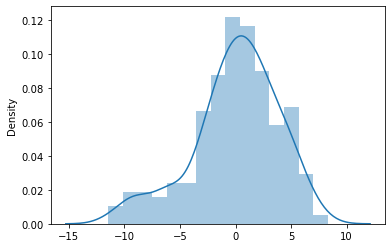

In [206]:
#distribution of residuals
sns.distplot(residuals)
plt.show()

In [207]:
#QQ plot
qqplot(residuals,fit=True, line='45')
plt.show()

In [208]:
#residuals are normally distributed

In [209]:
#Shapiro-Wilk normality test. 

snames=['The test statistic', 'p-value']
shapiro=shapiro(residuals)
print(list(zip(snames, shapiro)))

TypeError: 'ShapiroResult' object is not callable

In [210]:

#The null hypothesis of normal distribution is not rejected 

In [211]:
############################# MODEL 5 is final ###########################

In [212]:
##Experimenting TRANSFOMRAITON of dependent variable to natural logarithmic form

In [213]:
data_model6=data_model5

data_model6['lgrade'] = np.log(data['Final_Grade']+0.5)

# taking Log(x+1) instead of Log(x) to avoid issue with observation with 0 values
data_model6['studytime_2']=data['studytime']^2

In [214]:
data_model6 = data_model6.drop(['Final_Grade'], axis=1)

In [215]:
Y = data_model6.lgrade
X = data_model6.drop('lgrade', axis=1)
X = sm.add_constant(X)

X0, X1, Y0, Y1 = train_test_split(X,Y, test_size=0.25, random_state=42)


model = sm.OLS(Y0, X0)
results = model.fit()
results.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lgrade   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     6.383
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.39e-11
Time:                        21:06:11   Log-Likelihood:                -356.17
No. Observations:                 285   AIC:                             744.3
Df Residuals:                     269   BIC:                             802.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.1713      0.254      8.562      0.000       1.672       2.671
Pstatus               0.1759      0.184      0.958      0.339      -0.185       0.537
Medu                  0.0636      0.050      1.281      0.201      -0.034       0.161
studytime             0.0527      0.065      0.813      0.417      -0.075       0.180
failures             -0.3695      0.072     -5.124      0.000      -0.512      -0.228
schoolsup             0.0902      0.165      0.547      0.585      -0.234       0.415
famsup               -0.2244      0.110     -2.045      0.042      -0.441      -0.008
romantic             -0.3477      0.112     -3.102      0.002      -0.568      -0.127
goout                -0.0355      0.050     -0.713      0.477      -0.133       0.063
absences              0.0523      0.011      4.828      0.000       0.031       0.074
rural                -0.0957      0.128     -0.750      0.454      -0.347       0.156
reason_other          0.3861      0.178      2.174      0.031       0.036       0.736
reason_reputation     0.2124      0.131      1.627      0.105      -0.045       0.469
FG_edu               -0.3148      0.166     -1.892      0.060      -0.642       0.013
factivities          -0.3058      0.124     -2.457      0.015      -0.551      -0.061
studytime_2          -0.0553      0.030     -1.861      0.064      -0.114       0.003
==============================================================================
Omnibus:                       87.508   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.939
Skew:                          -1.555   Prob(JB):                     6.93e-41
Kurtosis:                       5.430   Cond. No.                         40.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [216]:
Y1_pred = results.predict(X1)
print ('R2', r2_score(Y1,Y1_pred))

R2 0.14488458073068866


In [217]:
#The previous model 5 performed better on tests

In [218]:
#Therefore our Model 5 is final model 